## CEOs Twitter Presence

In [99]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import numpy as np
import warnings
from textblob import TextBlob
from plotly.subplots import make_subplots
import seaborn as sns
warnings.filterwarnings('ignore')

In [100]:
def sentiment_analysis(ds):
        sentiment = TextBlob(ds['Tweets']).sentiment
        return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [165]:
ceo_names = ['sundar','albert','benioff','branson','dorsey','drewhouston','elonmusk','JeffBezos','timcook']

def ceo_df(name):
    ceo_raw = pd.read_csv("data/raw/"+name+".csv")
    ceo_raw["created_at"] = pd.to_datetime(ceo_raw["created_at"]).dt.date
    ceo_raw["created_at"] = pd.to_datetime(ceo_raw["created_at"])
    ceo_raw['full_text'] = ceo_raw['full_text'].astype(str)
    # ceo_tweets["Month"] = ceo_tweets['Date'].dt.month
    # ceo_tweets["Year"] = ceo_tweets['Date'].dt.year
    # ceo_tweets["Period"] = ceo_tweets["Month"].astype(str) + "-"+ceo_tweets["Year"].astype(str)
    ceo_cleaned = (    
        ceo_raw.groupby(["created_at"])
        .agg(
            Tweets=("full_text", "sum"),
            Agg_count=("full_text", "count"),
            Agg_retweet=("retweet_count", "sum"),
            Agg_favorite=("favorite_count", "sum")
        )
        .reset_index())
    ceo_cleaned['ceo'] = name
    ceo_raw['ceo'] = name
    ceo_cleaned['Tweets'] = ceo_cleaned['Tweets'].astype(str)
    
    
    # Aggregating Tweets
    ceo_pol = (    
        ceo_cleaned.groupby(["ceo"])
        .agg(
            Tweets=("Tweets", "sum"),
            Agg_count=("Agg_count", "count"),
            Agg_retweet=("Agg_retweet", "sum"),
            Agg_favorite=("Agg_favorite", "sum")
        )
        .reset_index())
    # Adding Subjectivity & Polarity
    ceo_pol[["subjectivity", "polarity"]] = ceo_pol.apply(sentiment_analysis, axis=1)
    
    return ceo_cleaned, ceo_raw, ceo_pol

sundar_cleaned, sundar_raw, sundar_pol = ceo_df('sundar')
albert_cleaned, albert_raw,albert_pol = ceo_df('albert')
benioff_cleaned, benioff_raw, benioff_pol  = ceo_df('benioff')
branson_cleaned, branson_raw, branson_pol = ceo_df('branson')
dorsey_cleaned, dorsey_raw, dorsey_pol = ceo_df('dorsey')
drewhouston_cleaned, drewhouston_raw, drewhouston_pol = ceo_df('drewhouston')
elonmusk_cleaned, elonmusk_raw, elonmusk_pol = ceo_df('elonmusk')
JeffBezos_cleaned, JeffBezos_raw, JeffBezos_pol = ceo_df('JeffBezos')
timcook_cleaned, timcook_raw, timcook_pol = ceo_df('timcook')

ceos_cleaned = [sundar_cleaned,albert_cleaned,benioff_cleaned,branson_cleaned,
                dorsey_cleaned,drewhouston_cleaned,elonmusk_cleaned,JeffBezos_cleaned,timcook_cleaned]
ceos_raw = [sundar_raw,albert_raw,benioff_raw,branson_raw,dorsey_raw,drewhouston_raw,elonmusk_raw,JeffBezos_raw,timcook_raw]
ceos_pol = [sundar_pol,albert_pol,benioff_pol,branson_pol,dorsey_pol,drewhouston_pol,elonmusk_pol,JeffBezos_pol,timcook_pol]
dfs_ceos_cleaned = pd.concat(ceos_cleaned, ignore_index=True)    
dfs_ceos_raw = pd.concat(ceos_raw, ignore_index=True)    
dfs_ceos_polarity = pd.concat(ceos_pol, ignore_index=True)    

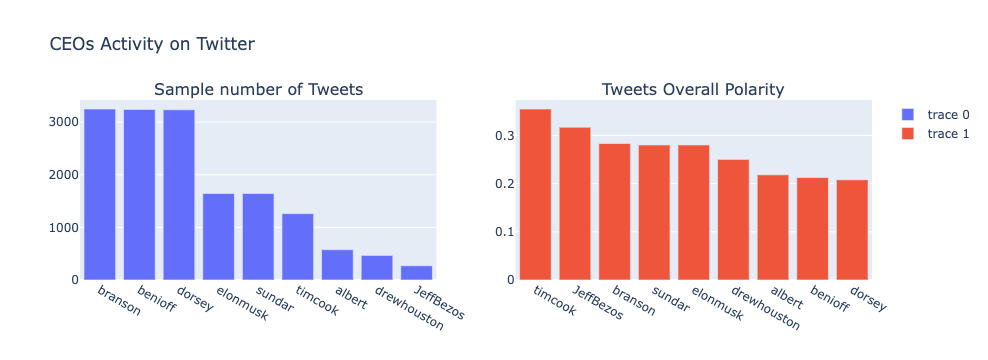

In [178]:
dfs_ceos_raw_plot = dfs_ceos_raw.groupby('ceo').count().reset_index()
dfs_ceos_raw_plot = dfs_ceos_raw_plot.sort_values(by='full_text',ascending=False)
dfs_ceos_polarity = dfs_ceos_polarity.sort_values(by='polarity',ascending=False)

fig = make_subplots(rows=1, cols=2,
                   subplot_titles=("Sample number of Tweets", "Tweets Overall Polarity"))
fig.add_trace(go.Bar(x=dfs_ceos_raw_plot['ceo'], y=dfs_ceos_raw_plot['full_text']), row=1, col=1)

fig.add_trace(go.Bar(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['polarity']), row=1, col=2)
fig.add_trace(go.Scatter(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['polarity']), row=1, col=2)
    
fig.update_layout(title_text="CEOs Activity on Twitter")

fig.show()

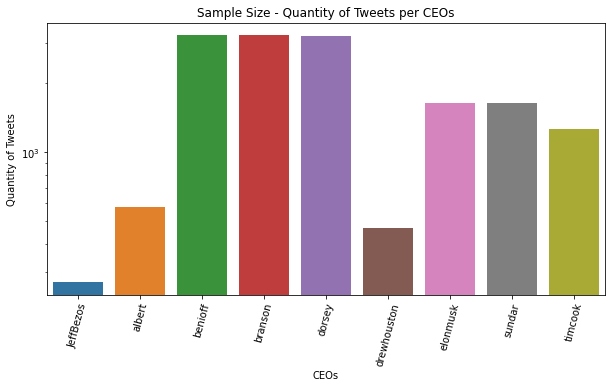

In [150]:
dfs_ceos_raw_plot = dfs_ceos_raw.groupby('ceo').count().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=dfs_ceos_raw['ceo'], y=dfs_ceos_raw['full_text'],ax=ax,log=True)
ax.set_title('Sample Size - Quantity of Tweets per CEOs')
plt.xlabel("CEOs")
plt.xticks(rotation=75)
plt.ylabel("Quantity of Tweets");

# fig.update_traces(marker={"color": "RoyalBlue"}, col=2)

fig.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

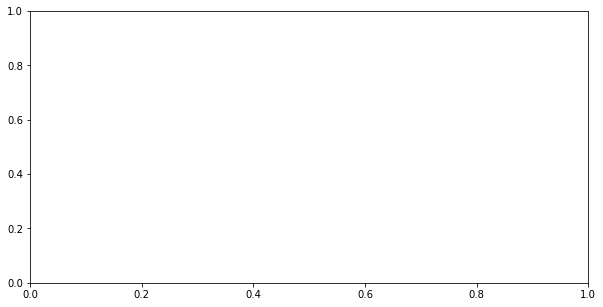

In [172]:
dfs_ceos_raw_plot = dfs_ceos_raw.groupby('ceo').count().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=dfs_ceos_raw['ceo'], y=dfs_ceos_raw['full_text'],ax=ax,log=True)
ax.set_title('Sample Size - Quantity of Tweets per CEOs')
plt.xlabel("CEOs")
plt.xticks(rotation=75)
plt.ylabel("Quantity of Tweets");

# fig.update_traces(marker={"color": "RoyalBlue"}, col=2)

fig.show()

In [163]:
dfs_ceos_polarity = dfs_ceos_polarity.sort_values(by='polarity',ascending=False)

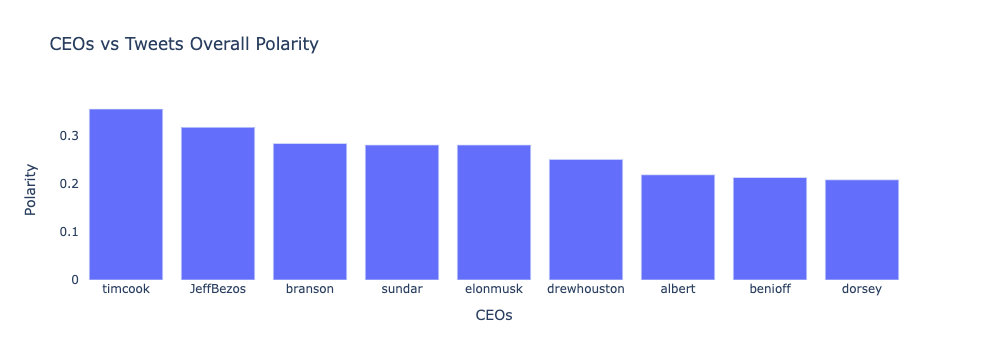

In [164]:
fig6 = go.Figure(data=[
    go.Bar(x=dfs_ceos_polarity['ceo'], y=dfs_ceos_polarity['polarity']),
],
    layout_plot_bgcolor="white",
    layout_title_text = "CEOs vs Tweets Overall Polarity",
    layout_yaxis_title = "Polarity",
    layout_xaxis_title = "CEOs")
fig6.show()